Hexadecimal is base 16. which means a few things:
- 10 numbers from 0-9, then 6 letters from the alphabet.
- factorising by powers of 16, then remainder by 16**2 (256)

this works well for colours, as RGB values go from 0 to 255, (256 of these for R, 256 for G, 256 B).
Therefore 256*256*256 = ~16.8M combinations of numbers

# calculating hex values for 256 colours

In [26]:
hex_bas16 = [str(x) for x in range(10)] + ['a', 'b', 'c', 'd', 'e', 'f']

def get_hex(num):
    return hex_bas16[num//16]+hex_bas16[num%16]


# GETTING A SUBSAMPLE OF THE FULL COLOURS - (easier to plot them and look at them)

In [36]:
def est_num_colours(reduction_factor):
    return (256/reduction_factor)**3

print('all colours: ', round(est_num_colours(1)))
print('reduced factor 2: ', round(est_num_colours(2)))
print('reduced factor 3:', round(est_num_colours(3)))
print('reduced factor 4: ', round(est_num_colours(4)))
print('reduced factor 5:', round(est_num_colours(5)))

print('reduced factor 20:', round(est_num_colours(20)))

all colours:  16777216
reduced factor 2:  2097152
reduced factor 3: 621378
reduced factor 4:  262144
reduced factor 5: 134218
reduced factor 20: 2097


In [37]:
# I won't do 16M for now.
reduction_factor = 20

total_hex_combos = []
for r in range(256):
    if r % reduction_factor == 0:

        for g in range(256):
            if g % reduction_factor == 0:

                for b in range(256):
                    if b % reduction_factor == 0:
                        total_hex_combos.append(get_hex(r)+get_hex(g)+get_hex(b))
                        

# plotting colours

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

PLOTTING FROM THE TOP LEFT ACROSS TO THE RIGHT, then down the next row

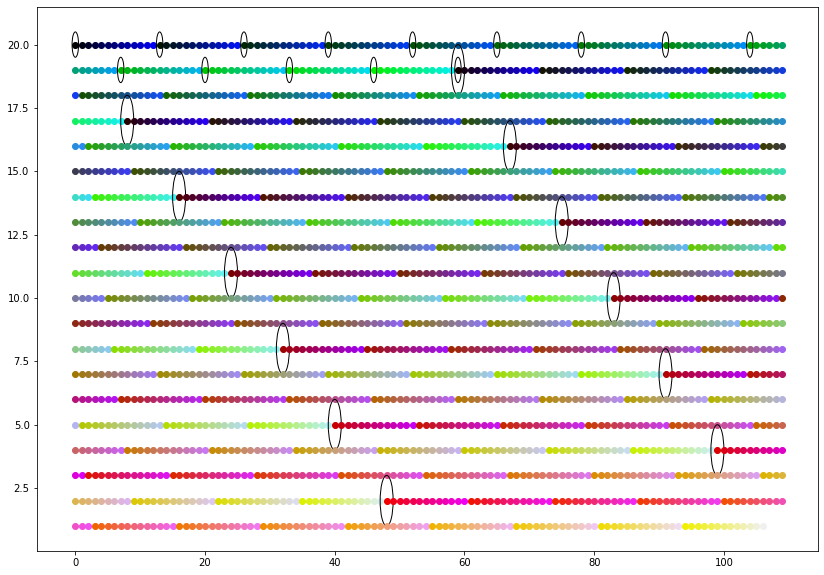

In [84]:
fig,ax = plt.subplots(figsize=(14,10))

x_values = (len(total_hex_combos) // 20) + 1
y_values = 20

for idx, colour in enumerate(total_hex_combos):
    xval = idx % x_values
    yval = y_values - (idx // x_values)
    ax.scatter(xval, yval, c=f'#{colour}')

    #circles everytime the Blue colour resets back to zero
    if idx % 13 == 0 and idx <= 13*13:
        ax.add_patch(plt.Circle((xval,yval),color='#000000', fill=False,radius=0.5))
    
    #circles everytime the Green colour resets back to zero
    if idx % (13*13) == 0 and idx >= 13*13:
        ax.add_patch(plt.Circle((xval,yval),color='#000000', fill=False,radius=1))
        
    #Red colour never resets to zero, as by that time, we've been through all combinations of R G and B.

Theres a repeating near pattern here. 

We have plotted every 20 colours from the RGB colour space

Circles are pulling out each 13 colours from the 20-spaced ones.

so every 13*20 colours seems to have a pattern visually. They are different, but there's definitely a shade similarity


In [80]:
13*20

260

No surprise.... the pattern is every 256 colours.. So everytime BLUE resets to 0. 
(as blue is inner-most colour in our for-loop to create the colour list).

you can see they are blue-est before the pattern resets. This is most noticible in the top row as the red and green colour values are low.

Green is next most inner in the for-loop, therefore this is the next colour to gradually build up. IT REACHES ITs first peak AFTER 13 cycles of the blues. so count 13 Big circles along from the top left. You can see it goes very greeny-turquoise before the dark blue/green/brown comes in (I'm colour blind - probably doesn't help much with this project :] )

Reds come in at the end. You can see that on the last big circle, it goes from red to pink as we add blue to the red.
at the very end (last 13 dots), where we have max green and max red, we get yellow. as we add more blue to this, it becomes white.

scanning from top to bottom, we can see that red starts to dominate and addition of blue tends to produce a pinker shade of red.



It's possibly my colour blindness, but to me, the second top (19) row and middle row (10 on y-axis) have extremely similar shades of turquoisy/green, so it's as if I'm not able to perceive much of a change in colour when adding a small amount (actually more like HALF red) to the mix.

lets check this more closely:

<BarContainer object of 1 artists>

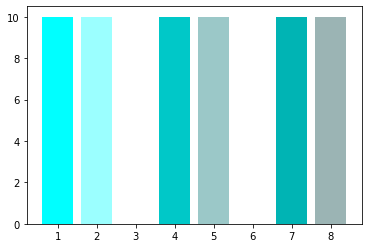

In [90]:

#NO RED - MAX GREEN AND BLUE
red = get_hex(0)
green = get_hex(255)
blue = get_hex(255)
plt.bar(1,10,color='#'+red+green+blue)

#HALF RED - MAX GREEN AND BLUE
red = get_hex(155)
green = get_hex(255)
blue = get_hex(255)
plt.bar(2,10,color='#'+red+green+blue)

#NO RED - HIGH GREEN AND BLUE
red = get_hex(0)
green = get_hex(200)
blue = get_hex(200)
plt.bar(4,10,color='#'+red+green+blue)

#HALF RED - HIGH GREEN AND BLUE
red = get_hex(155)
green = get_hex(200)
blue = get_hex(200)
plt.bar(5,10,color='#'+red+green+blue)

#NO RED - ED-HIGH GREEN AND BLUE
red = get_hex(0)
green = get_hex(180)
blue = get_hex(180)
plt.bar(7,10,color='#'+red+green+blue)

#HALF RED - MED-HIGH GREEN AND BLUE
red = get_hex(155)
green = get_hex(180)
blue = get_hex(180)
plt.bar(8,10,color='#'+red+green+blue)

These look quiet different.m

# NEXT... look up some frequencies of light/colours. and try plotting colours with double/triple the frequency

Wavelengths of visible light go from about 400 (UV) -450 nm to 700-750 (INFRARED)

freq = 1/wavelength

In [92]:
max_possible_freq_ratio = (1/400) / (1/750)
max_possible_freq_ratio

1.875

Max ratio is less than 2, so you can't do harmonics like sound which is in Hz/KHz/Mhz etc and has a wider range

Issue: can't convert hex to wavelength as some combos of RGB will produce similar frequencies. 

So you need to start with freq and then convert to RGB, then lookup the hex and use these

AFAIK, there is no direct answer because multiple wavelengths can combine to give the same color right? So you have the wavelengths that map to pure colors and then their combinations can give many other and the same colors. And there are several combinations that can give the same color. This is because of inteference. So you essentially are asking for a one to many mapping.

To answer your question: There is no fixed formula. The reverse formulas will give you a range. That is the best it can get.

https://www.fourmilab.ch/documents/specrend/